In [23]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(scales)
library(IRdisplay)
library(knitr)
options(repr.plot.width = 7, repr.plot.height = 4)
isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X17b'='17b', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
fills = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8', 'A:U'='#93da69', 'U:A'='#93da69', 'G:C'='#c1764a', 'C:G'='#c1764a', 'G:U'='#b26cbd', 'U:G'='#b26cbd', '-'='gray60', '-:-'='gray60')
suppressWarnings(suppressMessages(library(Biostrings)))
options(knitr.table.format = 'html')

In [3]:
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')

In [4]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-freqs.RData')

In [5]:
identities = read.delim('identities-071917.tsv', sep='\t')
identities_all = identities
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% filter(isotype %in% isotypes)

In [6]:
genome_table = read.delim('genomes-061517.tsv', sep='\t', stringsAsFactors=FALSE, header=FALSE, col.names=c("species", "species_long", "domain", "clade", "taxid"))

# Introduction

Previous analysis in `euk-tRNAs` and `isotype-clade-specific` focused on processing and dicing the data with appropriate assumptions. Now, we move on to the meat of this project. For **new identity stories**, I'll employ a few strategies to find interesting stories in a systematic way. Some of these will have been covered in `first-pass-consensus`.

1. Find rejected universal sequence features. Set a cutoff at 95% presence, but fails (a) isotype check, (b) clade check, or (c) species check. Spin in previous work, if any. Bonus points if previous work _conflicts_ with our frequencies. I will select one of each for inclusion in the paper.
    
2. Find rejected isotype-specific sequence features. Slightly different from (1a) above, since this could apply to highly isotype-specific positions (e.g. N73). For the paper, find one example (choose between species or clade checks).

Per Todd's advice, I'll take a look at a few in each category.

In [11]:
# No. tRNAs we're looking at
identities %>% nrow
identities_all %>% nrow

[1] 82677

[1] 82691

## 31:39

In [13]:
identities %>% filter(!restrict, clade == "Fungi", isotype == "Tyr") %>% count(X31.39)

,X31.39,n
1,A:U,110
2,C:G,1
3,G:C,16
4,U:A,3


In [15]:
identities %>% filter(!restrict, clade == "Fungi", isotype == "Tyr") %>% count(X31.39, species) %>%
  spread(X31.39, n, 0) %>% filter(`A:U` == 0)

,species,A:U,C:G,G:C,U:A
1,aspeFumi_AF293,0,0,1,0
2,fusaVert_7600,0,0,4,0
3,myceTher_ATCC42464,0,0,1,0
4,neurCras_OR74A,0,0,3,0
5,schiPomb_972H,0,0,2,0
6,sporReil_SRZ2,0,0,0,2
7,thieTerr_NRRL_8126,0,0,1,0
8,ustiMayd_521,0,0,0,1


# Strategy 1: Universal features

### Find targets

In [7]:
code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_freqs %>%
    group_by(positions, feature) %>%
    summarize(count = sum(n), freq = sum(n)/sum(clade_iso_pos_total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff = as.character(cutoff)) %>%
    select(positions, feature, freq, cutoff) %>%
    group_by(positions) %>%
    arrange(code_groups[feature], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}

In [8]:
df = cutoff_freqs %>% 
  mutate(feature = as.character(feature)) %>%
  bind_rows(consensus %>% mutate(feature = identity, freq = 0.9, cutoff = "Consensus") %>% select(positions, feature, freq, cutoff)) %>%
  filter(positions %in% c(names(single_positions), names(paired_positions))) %>%
  select(positions, cutoff, feature) %>%
  group_by(positions) %>%
  spread(cutoff, feature)

df

,positions,0.5,0.6,0.7,0.8,0.9,0.95,0.99,Consensus
1,X1.72,GC,GC,GC,StrongPair,Paired,Paired,NA,NA
2,X10.25,GC,GC,GC,Paired,Paired,Paired,Paired,Paired
3,X11.24,CG,CG,PyrimidinePurine,PyrimidinePurine,PyrimidinePurine,PyrimidinePurine,Paired,Paired
4,X12.23,StrongPair,PyrimidinePurine,Paired,Paired,Paired,Paired,NA,NA
5,X13.22,PyrimidinePurine,Paired,NA,NA,NA,NA,NA,NA
6,X14,A,A,A,A,A,A,A,A
7,X15,G,G,G,Purine,Purine,Purine,NA,NA
8,X15.48,GC,GC,GC,PurinePyrimidine,PurinePyrimidine,Paired,NA,NA
9,X16,U,U,U,Pyrimidine,Pyrimidine,B,NA,NA
10,X17,Absent,Absent,NA,NA,NA,NA,NA,NA


For strategy 1A, some good candidates here: 
- R9 (95%)
- Y11:R24 (99%)
- G18, U55, and G18:U55 (99%)
- G19:C56 (99%)
- A21 and A14/A21 (99%)
- U33 (99%)
- R37 (99%)
- R46 (99%)
- G53:C61 (99%)
- U54:A58 (99%)
- U55 (99%)
- R57 (99%)
- Y60 (90%)

### R9 and R46

#### What's known

- Marck and Grosjean have a purine for iMet and no consensus for elongator, though they are mostly R or V. R9 is also conserved in initiators for archaea/bacteria.
- 9-12-23 is a tertiary interaction. [Gautheret et al. (1995)](http://dx.doi.org/10.1006/jmbi.1995.0200) has these frequencies from the Sprinzl 1991 database: ![9-12-23 frequency matrix](figures/9-12-23-gautheret.png)

- Position 9 is known to be modified with m$^1$G (along with 37) in a wide range of eukaryotes. 

#### Our data

- Here's our frequencies:

In [9]:
table(paste0(identities$X12, ':', identities$X23), identities$X9)

     
         -    A    C    G    U
  -:A    0    1    0    0    0
  -:G    0    0    0    1    0
  A:A    0    9    1   11    0
  A:C    0   36    2  255    0
  A:G    0    8    1   18    0
  A:U    0  707  229   78    7
  C:-    0    0    0    4    0
  C:A    0   16    0  116    2
  C:C    0    1    0    6    0
  C:G    0  382  125 8011   70
  C:U    0    0    0    8    0
  G:A    0    5    0    7    0
  G:C    1 1883   10 5070    7
  G:G    0    2    0   14    0
  G:N    0    0    0    1    0
  G:U    0   24    2   52    0
  U:A    5 8402   14 2179   47
  U:C    0    7    0    7    0
  U:G    0   43    0  103    1
  U:U    0    8    1    2    0

**Which isotypes/clades/species fail the consensus checks?**

In [10]:
## Clade/isotype check
best_freqs %>% filter(positions == 'X9') %>% group_by(clade, isotype) %>%
  summarize(status=sum((feature %in% c("G", "A", "Purine"))*count)/sum(count) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X9) %>% group_by(clade, species, isotype) %>%
  summarize(status=sum(X9 %in% c("G", "A", "Purine")/n()) >= 0.1,
            freq=sum(X9 %in% c("G", "A", "Purine")), ntRNAs=n()) %>%
  filter(!status)

ERROR: Error in eval(expr, envir, enclos): non-numeric argument to binary operator


#### What's new

The 9:12:23 ratios are a bit different. But it shows the same thing: there is some selectivity for what base triples are allowed, but enough tolerance that there are a few interactions that persist.

The default hypothesis is that the 9-23 interaction has a conserved interaction type that explains the frequencies shown. We can marginalize as such because 12:23 is always a WC pair. This is not the case - although some (R:R) have a a strong trans WC-Hoogsteen pair of hydrogen bonds, others (C:R) do not. The hoogsteen side of C is just two stable carbons unlikely to hydrogen bond.

Examining the frequencies _without_ histidine shows that the C9:U23 is conserved in His, and A9:U23 is conserved in Asp, for some clades. (See tertiary interactions figure).

In [ ]:
table(identities$X9, identities$X23)

So here's what we know.
- 12:23 is almost always WC paired, so we can marginalize it.
- 9 is typically a purine, though there are isotype- and clade-specific exceptions. For example, His and Asp deviate in 4 clades.
    - In the His case, C and U can interact via the 2-carbonyl [amino pairing](http://www.columbuslabs.org/wp-content/uploads/2008/03/basepairs.pdf).
- 9:23 is thought to be a _trans_ interaction with two hydrogen bonds.

**Conclusion 1**: Position 9 was thought to be a purine. Instead, it varies by isotype and clade. Much of the variation from R9 can be explained by looking at 9:23 as an clade/isotype discriminating tertiary interaction.

We can leave it at that. But we should also look into compensatory interactions if 9:23 is disrupted.

### Covariation for core D stem 3d pairs

#### tRNA covariation frequencies for 9:23, 22:46, and 10:45

In [ ]:
df = table(paste0(identities$X9, ':', identities$X23),
           paste0(identities$X46, ':', identities$X22, ' / ', identities$X45, ':', identities$X10),
           identities$isotype)

In [ ]:
as.data.frame(df) %>% group_by(Var3) %>% filter(Freq > 50)

This is messy. For each isotype there may be a different tertiary interaction compensating for the lack of A:A. It seems that purine:purine interactions are unusually enriched among all three of these except in valine. 

![classical interaction structure](figures/3d-interactions-oliva.png)

#### Average number of purine:purine interactions by isotype and clade

In [ ]:
RRs = c("A:A", "A:G", "G:G", "G:A")
identities %>% select(isotype, clade, X9.23, X22.46, X10.45, X26.44) %>% 
  rowwise() %>% 
  mutate(nRR=(X9.23 %in% RRs) + (X22.46 %in% RRs) + (X10.45 %in% RRs) + (X26.44 %in% RRs)) %>%
  group_by(isotype, clade) %>% 
  summarize(nRR=signif(mean(nRR), 3)) %>%
  spread(isotype, nRR)

#### Average number of purine:purine interactions by position/isotype

In [ ]:
RRs = c("A:A", "A:G", "G:G", "G:A")
identities %>% select(isotype, X9.23, X22.46, X10.45, X26.44) %>% 
  rowwise() %>% 
  mutate(X9.23=X9.23 %in% RRs, X22.46=X22.46 %in% RRs, X10.45=X10.45 %in% RRs, X26.44=X26.44 %in% RRs) %>%
  gather(position, RR, X9.23, X22.46, X10.45, X26.44, -isotype) %>%
  group_by(isotype, position) %>%
  summarize(RR=round(mean(RR), digits=1)) %>%
  spread(isotype, RR)

#### Average number of interactions containing a purine by position/isotype

In [ ]:
RRs = c("A:A", "A:G", "G:G", "G:A", "G:C", "C:G", "A:C", "C:A", "U:G", "G:U", "A:U", "U:A")
identities %>% select(isotype, X9.23, X22.46, X10.45, X26.44) %>% 
  rowwise() %>% 
  mutate(X9.23=X9.23 %in% RRs, X22.46=X22.46 %in% RRs, X10.45=X10.45 %in% RRs, X26.44=X26.44 %in% RRs) %>%
  gather(position, RR, X9.23, X22.46, X10.45, X26.44, -isotype) %>%
  group_by(isotype, position) %>%
  summarize(RR=round(mean(RR), digits=1)) %>%
  spread(isotype, RR)

#### Are non-purine-containing interactions enriched for some other type of interaction?

In [ ]:
identities %>% select(isotype, X9.23, X22.46, X10.45, X26.44) %>% 
  gather(position, identity, X9.23, X22.46, X10.45, X26.44, -isotype) %>%
  filter(!(identity %in% c(RRs, "G:-", "A:-"))) %>%
  group_by(position, isotype, identity) %>%
  summarize(count=n()) %>%
  filter(count > 20) %>%
  spread(identity, count, fill=0)

They are not - but they are isotype-specific.

**Summary**: Tertiary interactions within this "tRNA core region" along the D stem are enriched in purines and purine-purine interactions, though the extent varies by isotype and position. Exceptions are isotype-specific.

### G18, U55, and G18:U55

#### Number of tRNAs without G18:U55

In [8]:
identities %>% select(clade, species, X18, X55, X18.55) %>%
  filter(X18.55 != "G:U") %>% nrow()

[1] 1451

#### Which isotypes/clades/species fail the consensus checks?

In [10]:
best_freqs %>% head

,clade,isotype,positions,clade_iso_pos_total,feature,n,freq
1,Fungi,Ala,X14,298,A,298,1
2,Fungi,Ala,X21,298,A,298,1
3,Fungi,Ala,X37,298,A,298,1
4,Fungi,Ala,X58,298,A,298,1
5,Fungi,Ala,X73,298,A,298,1
6,Fungi,Arg,X14,446,A,446,1


In [22]:
## Clade/isotype check
best_freqs %>% filter(positions == 'X18.55') %>% group_by(clade, isotype) %>%
  summarize(status=sum((feature == "GU")*n)/sum(clade_iso_pos_total)) %>% filter(status < 0.9)

clade_iso_freqs %>% filter(positions == 'X18.55', isotype == 'Gly', clade == 'Vertebrata') %>% filter(freq > 0.05)

## Species check
identities %>% select(clade, species, isotype, X18.55) %>%
  group_by(clade, species, isotype) %>%
  summarize(status=sum((X18.55 == "G:U")/n()) >= 0.3,
            freq=sum(X18.55 == "G:U"), tRNAs=n()) %>%
  filter(!status)

,clade,isotype,status
1,Vertebrata,Gly,0


,clade,isotype,positions,clade_iso_pos_total,feature,n,freq
1,Vertebrata,Gly,X18.55,262,GC,34,0.129770992366412
2,Vertebrata,Gly,X18.55,262,GU,226,0.862595419847328
3,Vertebrata,Gly,X18.55,262,Paired,260,0.99236641221374
4,Vertebrata,Gly,X18.55,262,PurinePyrimidine,34,0.129770992366412
5,Vertebrata,Gly,X18.55,262,StrongPair,34,0.129770992366412
6,Vertebrata,Gly,X18.55,262,Wobble,226,0.862595419847328


,clade,species,isotype,status,freq,tRNAs
1,Fungi,flamVelu_KACC42780,Pro,0,0,10
2,Nematoda,strRat1,Glu,0,1,15
3,Vertebrata,danRer10,Gly,0,77,559
4,Vertebrata,gasAcu1,Pro,0,27,105
5,Vertebrata,oryLat2,Thr,0,18,73


In [25]:
identities %>% select(clade, species, isotype, score, X18.55) %>% filter(species == "valsMali_03_8", isotype == "Pro")

,clade,species,isotype,score,X18.55
1,Fungi,valsMali_03_8,Pro,58.7,C:U
2,Fungi,valsMali_03_8,Pro,58.6,C:U
3,Fungi,valsMali_03_8,Pro,47.2,G:U


In [42]:
identities %>% filter(!restrict, isotype == "Pro") %>% 
  count(taxid, species_long, isotype, X18.55) %>%
  spread(X18.55, n, 0) %>% filter(`A:U` != 0 | `C:U` != 0 | `U:U` != 0 | `G:C` != 0)

,taxid,species_long,isotype,A:U,C:U,G:C,G:U,U:U
1,.,Drosophila persimilis (D. persimilis Oct. 2005 Broad),Pro,1,0,0,4,0
2,.,Drosophila pseudoobscura (D. pseudoobscura Feb. 2006),Pro,1,0,0,4,0
3,.,Gasterosteus aculeatus (stickleback) (Broad 1.0 Feb 2006),Pro,0,0,5,4,0
4,.,Malus x domestica (apple v3.0.a1),Pro,0,0,1,13,0
5,.,Oreochromis niloticus (Nile tilapia Jan. 2011 Broad oreNil1.1/oreNil2),Pro,0,1,0,5,0
6,.,Pristionchus pacificus (WUGSC 5.0 Feb 2007),Pro,0,0,0,10,1
7,.,Takifugu rubripes (Fugu Oct. 2011 FUGU5/fr3),Pro,1,0,0,3,0
8,.,Tarsius syrichta (Tarsier Sep. 2013 Tarsius_syrichta-2.0.1/tarSyr2),Pro,1,0,0,6,0
9,.,Tetraodon nigroviridis (tetraodon) (Genoscope 8.0 Mar 2007),Pro,3,0,0,6,0
10,.,Xenopus tropicalis (frog) (JGI 4.2 Nov 2009),Pro,0,0,1,30,0


In [32]:
identities %>% filter(!restrict, isotype == "Pro", taxid %in% c(105487, 162425, 284591, 38945)) %>% 
  select(species_long, anticodon, X18.55, score, isoscore)

,species_long,anticodon,X18.55,score,isoscore
1,Aspergillus nidulans FGSC A4,AGG,G:U,62.1,108.9
2,Aspergillus nidulans FGSC A4,AGG,G:U,60.6,106.2
3,Aspergillus nidulans FGSC A4,AGG,G:U,63.7,108.4
4,Aspergillus nidulans FGSC A4,AGG,G:U,60.7,106.2
5,Aspergillus nidulans FGSC A4,CGG,G:U,59.7,107.2
6,Aspergillus nidulans FGSC A4,TGG,C:U,58.5,103
7,Aspergillus nidulans FGSC A4,TGG,C:U,60,108.2
8,Aspergillus nidulans FGSC A4,AGG,G:U,60.4,104.2
9,Flammulina velutipes KACC42780,TGG,C:U,49.4,80
10,Flammulina velutipes KACC42780,TGG,C:U,49.2,80


Earlier, we had a vertebrate check fail because of the methods used to build the quality set. I've relaxed the species check constraints to 10% to better identify IDEs even when there are massively amplified tRNAs. Curiously, in danRer10, gasAcu1, and oryLat2, the majority of the non-G:U tRNAs contain a G:C. It's pretty likely that, given the high copy number, many of these tRNAs are actually pseudogenes. In addition, there are a decent amount of G18:U55 tRNAs to actually drive translation.

The two fungi listed here are rare exceptions to the rule. _Flammulina velutipes_ is the enokitake mushroom, and none of its proline tRNAs contain G18. _Valsa mali_ is a fungus that infects apple trees. It contains 4 proline tRNAs. The first two (Pro-AGG-1, Pro-CGG-1) score at 22 and 47, contain G18:U55, and are filtered out. The other two (Pro-TGG-1) score at 58, and contain C18:U55. So we have two main possibilities here.

1. G18:U55 is required for proper folding and recognition. Pro-CGG-1 is used as the main proline tRNA.
2. G18:U55 is not required. The synthetase is able to recognize some combination of Pro-CGG and Pro-TGG.

The evidence below points to option 2. In fungi, TGG is a much more common anticodon than CGG. Pro-TGG in this species also scores better, and contains a position 47. There are only two other fungal proline tRNAs without a position 47, both of which exist in _Encephalitozoon_ species, and both of which are supplemented by other high-scoring proline tRNAs.

#### Fungal proline anticodon usage /  Fungal proline position 47 incidence

In [ ]:
identities %>% select(clade, isotype, anticodon) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, anticodon) %>%
  summarize(count=n())

identities %>% select(clade, isotype, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, isotype, X47) %>%
  summarize(count=n()) %>%
  spread(X47, count)

identities %>% select(clade, species, isotype, anticodon) %>%
  filter(isotype == "Pro" & clade == "Fungi") %>%
  group_by(clade, species, isotype, anticodon) %>% 
  tally %>% spread(anticodon, n, 0)

identities %>% select(clade, species, species_long, seqname, isotype, score, X47) %>%
  filter(isotype == "Pro" & clade == "Fungi" & X47 == "-")

### G19:C56

We now look at 19:56 in context of 18:55. G19:C56 similarly hits 99% frequency.

#### Distribution of 18:55 and 19:56

In [ ]:
identities %>% select(X18.55, X19.56) %>%
  group_by(X18.55, X19.56) %>%
  summarize(count=n()) %>%
  filter(count > 5) %>%
  spread(X19.56, count, fill=0)

What may be happening here is that 18:55 and 19:56 act in concert. Both are required, but failing that, having at least one of them will weakly preserve the tertiary structure. This makes sense in context of the tertiary structure shown above - 18:55 and 19:56 are right next to each other and perform the same function, forming the tRNA elbow. 

In this case, whether it fails the species or isotype/clade check doesn't matter anymore, unless we specifically see enrichment for a clade/isotype.

The one exception is with the 9 tRNAs for A18:U55 and G19:U56. Let's take a look at both of them.

#### Is there enrichment for certain isotypes/clades for the non-GU/GC tRNAs?

This measures the percentage of tRNAs in the isotype/clade with non-GU/GC tRNAs.

**Either no G:U or no G:C:**

In [ ]:
identities %>% select(isotype, clade, X18.55, X19.56) %>%
  group_by(isotype, clade) %>%
  mutate(total=n()) %>%
  filter(X18.55 != 'G:U' | X19.56 != 'G:C') %>%
  summarize(freq=signif(n()/unique(total), digits=2), count=n(), total=total[1]) %>%
  filter(freq > 0.05) %>%
  arrange(desc(freq))

**Neither G:U nor G:C:**

In [ ]:
identities %>% select(isotype, clade, X18.55, X19.56) %>%
  group_by(isotype, clade) %>%
  mutate(total=n()) %>%
  filter(X18.55 != 'G:U' & X19.56 != 'G:C') %>%
  summarize(freq=signif(n()/unique(total), digits=2), count=n(), total=total[1]) %>%
  filter(freq > 0.01) %>%
  arrange(desc(freq))

We see differential enrichment in the "not GU or not GC" case, but not in this case ("not GU/GC"). Which is to be expected - it's easier to mutate one or the other, rather than both. But just in case, we'll double check these clades.

#### Which species have which divergent identities at 18:55 and 19:56?

In [ ]:
identities %>% select(isotype, clade, X18.55, X19.56) %>%
  filter((isotype == "Gly" & clade == "Vertebrata") | (isotype == "Lys" & clade == "Mammalia") | (isotype == "Met" & clade == "Fungi")) %>%
  group_by(isotype, clade, X18.55, X19.56) %>%
  summarize(count=n()) %>%
  filter(count > 1) %>%
  spread(X19.56, count, fill=0)

identities %>% select(isotype, clade, species, X18.55, X19.56) %>%
  filter(isotype == "Met" & clade == "Fungi") %>%
  group_by(species, clade, isotype) %>% mutate(total_tRNAs=n()) %>%
  filter(X18.55 == "G:-" & X19.56 == "G:-") %>%
  group_by(species, clade, isotype, total_tRNAs) %>% summarize(count=n())

identities %>% select(isotype, clade, species, X18.55, X19.56) %>%
  filter(isotype == "Gly" & clade == "Vertebrata") %>%
  group_by(species, clade, isotype) %>% mutate(total_tRNAs=n()) %>%
  filter(X18.55 == "G:C" & X19.56 == "G:C") %>%
  group_by(species, clade, isotype, total_tRNAs) %>% summarize(count=n())

identities %>% select(isotype, clade, species, X18.55, X19.56) %>%
  filter(isotype == "Lys" & clade == "Mammalia") %>%
  group_by(species, clade, isotype) %>% mutate(total_tRNAs=n()) %>%
  filter(X18.55 == "G:U" & X19.56 == "G:U") %>%
  group_by(species, clade, isotype, total_tRNAs) %>% summarize(count=n())

If it's the case that G:C/G:C or G:U/G:U is deficient, both vertebrate glycine and mammalian lysine are well-compensated in each species by other tRNAs, since there are so many tRNA copies.

Now to go back to the original 18:55 and 19:56 table - 

#### Is there enrichment in certain isotypes/clades/species for A18:U55 and G19:U56?

In [ ]:
identities %>% select(isotype, clade, species, X18.55, X19.56) %>%
  group_by(isotype, clade, species) %>% mutate(total_tRNAs=n()) %>%
  filter(X18.55 == "A:U" & X19.56 == "G:U")

There is slight enrichment, but it's nothing especially noteworthy, unless it's a conserved atypical tRNA. Let's check for that later. Each of these species has a lot of tRNAs that can compensate for one faulty tRNA. It's also worth noting that A:U and G:U are the most common single mutations, making it likely that they can still participate in the 3D interaction. Thus, a double mutation may be the strongest non-GU/GC interaction.

**Do the fungal proline tRNAs without G18:U55 have G19:C56?** They have to, otherwise they would've appeared in the table above!

#### What's known

G19 often contains a 2'-O-methyl modification, and in the majority of tested tRNAs, U55 is modified to $\Psi$. It's known that G18:U55 and G19:C56 are conserved.

A kinetics study showed an 80-fold decrease in translation efficiency (because of ribosome docking) without G18:U55 ([Pan et al. 2006](http://www.nature.com/nsmb/journal/v13/n4/full/nsmb1074.html)).

#### Summary

- 18:55 and 19:56 frequencies have been studied in isolation but not together.
- G18:U55 and G19:C56 are vital for forming the tertiary structure at the tRNA elbow, and exist in 96% of tRNAs.
- If it's not 100% conserved, is it a clade/isotype IDE, or is it an artifact of high-copy pseudogenes?
    - Most of the remaining 4% has one mutation. For the two most egregious isotypes/clades, each species has several more tRNAs of the same isoacceptor to compensate. These can be explained by pseudogenes getting through the quality filter.
    - There are also 9 tRNAs with two mutations. All of them are AU/GU, and like before, each species have several more tRNAs of the same isoacceptor to compensate.
- Based on this evidence, I would say that having one of G18:U55 and G19:C56 is an identity element.    

### Y11:R24

This one meets our definition of consensus, though it doesn't reach the 99% threshold. Let's see if the tRNAs themselves are enriched in any way.

#### Number of tRNAs without C11:G24 or U11:A24

In [11]:
identities %>% select(clade, species, X11.24) %>%
  filter(!(X11.24 %in% c("C:G", "U:A"))) %>% nrow()

[1] 689

#### Clade / isotype enrichment for tRNAs without Y11:R24

In [14]:
display_markdown(paste(as.character(kable(identities %>% select(clade, restrict, isotype, X11.24) %>%
  filter(!restrict & !(X11.24 %in% c("C:G", "U:A"))) %>%
  group_by(clade, isotype) %>%
  summarize(count = n()) %>%
  spread(isotype, count, fill = 0))), collapse = "\n"))

<table>
 <thead>
  <tr>
   <th style="text-align:left;"> clade </th>
   <th style="text-align:right;"> Ala </th>
   <th style="text-align:right;"> Arg </th>
   <th style="text-align:right;"> Asn </th>
   <th style="text-align:right;"> Asp </th>
   <th style="text-align:right;"> Cys </th>
   <th style="text-align:right;"> Gln </th>
   <th style="text-align:right;"> Glu </th>
   <th style="text-align:right;"> Gly </th>
   <th style="text-align:right;"> His </th>
   <th style="text-align:right;"> Ile </th>
   <th style="text-align:right;"> iMet </th>
   <th style="text-align:right;"> Leu </th>
   <th style="text-align:right;"> Lys </th>
   <th style="text-align:right;"> Met </th>
   <th style="text-align:right;"> Phe </th>
   <th style="text-align:right;"> Pro </th>
   <th style="text-align:right;"> Ser </th>
   <th style="text-align:right;"> Thr </th>
   <th style="text-align:right;"> Trp </th>
   <th style="text-align:right;"> Tyr </th>
   <th style="text-align:right;"> Val </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Fungi </td>
   <td style="text-align:right;"> 6 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 7 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 13 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 5 </td>
   <td style="text-align:right;"> 7 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 9 </td>
   <td style="text-align:right;"> 91 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Insecta </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Mammalia </td>
   <td style="text-align:right;"> 23 </td>
   <td style="text-align:right;"> 11 </td>
   <td style="text-align:right;"> 32 </td>
   <td style="text-align:right;"> 6 </td>
   <td style="text-align:right;"> 16 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 11 </td>
   <td style="text-align:right;"> 11 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 17 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 5 </td>
   <td style="text-align:right;"> 46 </td>
   <td style="text-align:right;"> 27 </td>
   <td style="text-align:right;"> 11 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 6 </td>
   <td style="text-align:right;"> 8 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Nematoda </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Spermatophyta </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 9 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 16 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 11 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 1 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 1 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Vertebrata </td>
   <td style="text-align:right;"> 7 </td>
   <td style="text-align:right;"> 9 </td>
   <td style="text-align:right;"> 24 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 7 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 9 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 6 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 12 </td>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 13 </td>
   <td style="text-align:right;"> 2 </td>
   <td style="text-align:right;"> 12 </td>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 12 </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> 7 </td>
  </tr>
</tbody>
</table>

What's this strange bump in fungal valine tRNAs?

#### Frequency of non-Y11:R24 tRNAs in fungi Val

In [ ]:
identities %>% select(clade, quality, isotype, X11.24) %>%
  filter(quality & clade == "Fungi" & isotype == "Val") %>%
  group_by(clade, isotype, X11.24) %>%
  summarize(count = n())

There's high frequency of U11:G24 (though technically, it is also a pyrimidine:purine interaction).

#### What's known

- [Ohana et al. 1994](http://dx.doi.org/10.1006/abbi.1994.1503) studied yeast Ser, which contains C11:G24. A switch to G11:C24 decreased aminoacylation efficiency to 78%.
- C11:G24, along with G10:C25, are vital for m$^2_2$G26, according to [Edqvist et al. 1992](https://doi.org/10.1093/nar/20.24.6575). However, other eukaryotes such as _Drosophila_ contain the modification even without these identities.
- U11:A24 prevents RNase P processing in _Drosophila_ ([Levinger et al. 1995](10.1074/jbc.270.32.18903)). It's noted that the tRNA probably folds correctly, and the recognition is stalled by "local helix deformation". 
- This identity element is also important in mitochondrial tRNAs ([Takeuchi et al. 2001)](http://www.jbc.org/content/276/23/20064.full)).

#### What's new

#### Covariance of 10:25 and 11:24 for fungi vs all other clades

In [ ]:
identities %>% select(clade, isotype, X10.25, X11.24) %>%
  filter(isotype == "Val") %>%
  mutate(clade=ifelse(clade == "Fungi", "Fungi", "Other")) %>%
  filter(X11.24 %in% c("U:A", "C:G", "U:G")) %>%
  group_by(clade) %>%
  mutate(total=n()) %>%
  group_by(clade, total, X10.25, X11.24) %>%
  summarize(count=n()) %>%
  mutate(freq=count/total) %>%
  filter(freq > 0.01) %>%
  select(-total, -count) %>%
  spread(X10.25, freq, fill=0)

A whopping **27%** of fungal valine tRNAs contain G10:C25 and U11:G24. This is very different from other eukaryotic valines, which hovers around 92% for G10:C25 and U11:A24. This seems to be tolerated specifically in fungal valine tRNAs. This could potentially be a switch for modification or for cleavage. Is this enriched in specific species?

In [40]:
identities %>% filter(!restrict, isotype == "Val", clade == "Fungi", X11.24 %in% c("U:A", "C:G", "U:G")) %>%
  mutate(identity = paste0(X10.25, ' / ', X11.24)) %>%
  group_by(species, identity) %>%
  summarize(count = n()) %>%
  spread(identity, count, fill = 0) %>% filter(`G:C / U:G` == 0 & `G:C / U:A` == 0)

,species,A:U / C:G,A:U / U:A,G:C / C:G,G:C / U:A,G:C / U:G,G:U / C:G,G:U / U:A,U:U / U:A
1,crypGatt_WM276,0,1,0,0,0,2,0,0
2,crypNeof_VAR_GRUBII_H99,0,2,0,0,0,2,0,0
3,crypNeof_VAR_NEOFORMANS_B_3501,0,2,0,0,0,2,0,0
4,crypNeof_VAR_NEOFORMANS_JEC21,0,2,0,0,0,2,0,0
5,flamVelu_KACC42780,0,0,3,0,0,0,4,0
6,peniChry_P2NIAD18,0,0,1,0,0,0,2,0
7,schiPomb_972H,0,0,0,0,0,0,3,1
8,sporReil_SRZ2,0,0,5,0,0,0,0,0
9,ustiMayd_521,0,0,3,0,0,1,0,0


G10:C25 / U11:A24 (canonical) and G10:C25 / U11:G24 (fungal valine) are broadly distributed. Seems like in fungi, both are tolerated by the synthetase or do some other conserved function.

There are a few species that are noteworthy, though:

_Flammulina velutipes_ shows up here again. _Cryptococcus_, _Penicillium chrysogenum_, _Ustilago maydis_, _Sporisorium reilianum_, and _S. pombe_ are all exceptions that contain neither the canonical set or the fungal valine set of features. Instead, they contain a variety of different features.

<img src='figures/fungi-tree.png' style="width: 700px;">

All of the aforementioned species group together. 

### R15:Y48

#### Number of tRNAs without R15:Y48

In [ ]:
identities %>% select(clade, species, X15.48) %>%
  filter(!(X15.48 %in% c('G:C', 'A:U'))) %>% nrow()

#### Which isotypes/clades/species fail the consensus checks?

In [ ]:
best_freqs %>% head

In [ ]:
## Clade/isotype check
best_freqs %>% filter(positions == 'X15.48') %>% group_by(clade, isotype) %>%
  summarize(status = sum((feature %in% c('GC', 'AU', 'PurinePyrimidine')) * n) / sum(n) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X15.48) %>%
  group_by(clade, species, isotype) %>%
  summarize(status = sum((X15.48 %in% c('G:C', 'A:U'))/n()) >= 0.1,
            freq = sum(X15.48 %in% c('G:C', 'A:U')), tRNAs = n()) %>%
  filter(!status)

This one's the Levitt base pair, and has been shown in E. coli to tolerate different combinations other than R15:Y48. Despite the historical hubbub, it looks like a typical clade/isotype-specific IDE. Are any isotypes enriched?

In [ ]:
identities %>% select(clade, species, isotype, X15.48) %>%
  group_by(isotype) %>%
  summarize(freq=sum((X15.48 %in% c('G:C', 'A:U'))/n()))

### A21 and 8-14-21

#### Number of tRNAs without A21 or U8-A14-A21

In [ ]:
identities %>% select(clade, species, X8.14, X21) %>%
  filter(X8.14 != 'U:A' & X21 != 'A') %>% nrow()

identities %>% select(clade, species, X8.14, X21) %>%
  filter(X21 != 'A') %>% nrow()

Even though U:A:A is almost universally conserved, I'm going to focus on A21. The 4 tRNAs without U:A:A can easily be explained away by compensatory tRNAs with U:A:A.

#### Which isotypes/clades/species fail the consensus checks?

In [ ]:
## Clade/isotype check
best_freqs %>% filter(positions == 'X21') %>% group_by(clade, isotype) %>%
  summarize(status=sum((feature == 'A')*count)/sum(count) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X21) %>%
  group_by(clade, species, isotype) %>%
  summarize(status=sum(X21 == 'A')/n() >= 0.1,
            freq=sum(X21 == 'A'), tRNAs=n()) %>%
  filter(!status)

In [ ]:
identities %>% select(clade, species, isotype, anticodon, score, isoscore, X8, X14, X15, X16, X17, X17a, X18, X19, X20, X20a, X20b, X21, X22) %>%
  filter((species %in% c("aspeNidu_FGSC_A4", "sporReil_SRZ2", "ustiMayd_521") & isotype == "Phe") | (species %in% c("schiPomb_972H") & isotype == "Met"))

It's hard to say whether these are misalignments or not. _S. pombe_ was previously noted as an exception to the A21 rule. We introduce 3 new exceptions with no compensatory tRNAs. It's unusual that all of them are Phe. It's probably not evolutionarily related since there are several more species more related to each of them (e.g., _Aspergillus oryzae_). One possibility is that the fungi Phe synthetase or processing machinery is more permissive in general, and that it can tolerate mutations.

#### What's known

M&G: Always A21, but there are 3 copies of G21 in _S. pombe_. It interacts as U8-A14-A21.

### U33

#### Number of tRNAs without U33

In [ ]:
identities %>% select(clade, species, X33) %>%
  filter(X33 != 'U') %>% nrow()

#### Which isotypes/clades/species fail the consensus checks?

In [ ]:
## Clade/isotype check
best_freqs %>% filter(positions == 'X33') %>% group_by(clade, isotype) %>%
  summarize(status=sum((feature == 'U')*count)/sum(count) == 1) %>%
  filter(!status)

This is a pretty strong non-Fungi iMet identity element (which is known). M&G note some Cs here and there, plus a G33 in _Candida albicans_ that disrupts the anticodon arm and deforms the tRNA, decreasing charging efficiency.

## Other thoughts

- Although the synthetase and tRNA should represent a stronger evolutionary signal w.r.t speciation, this isn't the case for tRNA processing that is not isotype-specific.
    - For instance, yeast has an unusually high amount of introns. 
    - This could apply to other processing enzymes, e.g., RNase P, RNase Z, etc.


# Strategy 2: Isotype-specific features

In [ ]:
iso_cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_freqs %>%
    group_by(isotype, positions, feature) %>%
    summarize(count = sum(n), freq = sum(n)/sum(clade_iso_pos_total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff = as.character(cutoff)) %>%
    select(isotype, positions, feature, freq, cutoff) %>%
    group_by(isotype, positions) %>%
    arrange(code_groups[feature], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(iso_cutoff_freqs) == 0) iso_cutoff_freqs = df
  else iso_cutoff_freqs = rbind(iso_cutoff_freqs, df)
}

In [ ]:
iso_cutoff_freqs %>% 
  mutate(feature = as.character(feature)) %>%
  bind_rows(isotype_specific %>% mutate(feature = identity, freq = 0.9, cutoff = "Isotype-specific") %>% select(-identity)) %>%
  filter(positions %in% c(names(paired_positions), names(single_positions))) %>%
  filter(!(positions %in% cutoff_freqs$positions[cutoff_freqs$cutoff == 0.9 & cutoff_freqs$feature %in% c("A", "C", "G", "U", "AU", "UA", "GC", "CG", "UG", "GU")])) %>%
  filter(cutoff %in% c(0.95, 'Isotype-specific')) %>%
  select(-freq) %>%
  spread(cutoff, feature) %>% # generate NAs for missing identities
  gather(cutoff, feature, -isotype, -positions) %>%
  group_by(isotype, positions) %>%
  arrange(cutoff) %>% 
  summarize(identity = paste(feature, collapse = " / ")) %>%
  spread(isotype, identity, fill = '-') %>%
  kable %>% as.character %>% display_markdown

Literally hundreds of candidates here. I want to choose a position that is (a) not involved in 3D interactions, (b) not involved in base pairing, (c) has clear isotype specificity, (d) does not have clear functionality (aside from intron splicing, but this is an exception), (e) is a single position (we looked at a lot of base pairs above), and (f) differs between 99% and isotype-specific cutoffs. It'd also be nice if the isotype is not Pro and is of Type I, and the exception is not from Fungi.

First - we try Tyr-A38:

In [ ]:
iso_cutoff_freqs %>% mutate(feature = as.character(feature)) %>%
  bind_rows(isotype_specific %>% mutate(feature = identity, freq = 0.9, cutoff = "Isotype-specific") %>% select(-identity)) %>%
  filter(isotype == "Tyr" & positions == "X38") %>%
  spread(cutoff, feature, fill = '-') %>% select(-freq)

#### No. of Tyr RNAs without A38

In [ ]:
identities %>% select(clade, species, isotype, X38) %>%
  filter(isotype == "Tyr" & X38 != 'A') %>% nrow()

#### Which species or clades fail the check?

In [ ]:
## Clade check
best_freqs %>% filter(positions == 'X38' & isotype == "Tyr") %>% group_by(clade) %>%
  summarize(status=sum((feature == 'A')*count)/sum(count) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X38) %>%
  filter(isotype == "Tyr") %>%
  group_by(clade, species) %>%
  summarize(status=sum(X38 == 'A')/n() >= 0.1,
            freq=sum(X38 == 'A'), tRNAs=n()) %>%
  filter(!status)

Yet another example with these two fungi. Next, we try Asp-U59:

#### No. of Asp RNAs without U59

In [ ]:
iso_cutoff_freqs %>% mutate(feature = as.character(feature)) %>%
  bind_rows(isotype_specific %>% mutate(feature = identity, freq = 0.9, cutoff = "Isotype-specific") %>% select(-identity)) %>%
  filter(isotype == "Asp" & positions == "X59") %>%
  spread(cutoff, feature, fill = '-') %>% select(-freq)

#### Which species or clades fail the check?

In [ ]:
## Clade check
best_freqs %>% filter(positions == 'X59' & isotype == "Asp") %>% group_by(clade) %>%
  summarize(status=sum((feature == 'U')*count)/sum(count) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X59) %>%
  filter(isotype == "Asp") %>%
  group_by(clade, species) %>%
  summarize(status=sum(X59 == 'U')/n() >= 0.1,
            freq=sum(X59 == 'U'), tRNAs=n()) %>%
  filter(!status)

More fungi examples. Next, we try Ile 29:41.

#### Ile G29:C41

In [ ]:
## No. tRNAs without G29:C41
identities %>% select(clade, species, isotype, X29.41) %>%
  filter(isotype == "Ile" & X29.41 != 'G:C') %>% nrow()

## Clade check
best_freqs %>% filter(positions == 'X29.41' & isotype == "Ile") %>% group_by(clade) %>%
  summarize(status=sum((feature == 'GC')*count)/sum(count) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X29.41) %>%
  filter(isotype == "Ile") %>%
  group_by(clade, species) %>%
  summarize(status=sum(X29.41 == 'G:C')/n() >= 0.1,
            freq=sum(X29.41 == 'G:C'), tRNAs=n()) %>%
  filter(!status)

#### Cys A38

In [ ]:
## No. tRNAs without A38
identities %>% select(clade, species, isotype, X38) %>%
  filter(isotype == "Cys" & X38 != 'A') %>% nrow()

## Clade check
best_freqs %>% filter(positions == 'X38' & isotype == "Cys") %>% group_by(clade) %>%
  summarize(status=sum((feature == 'A')*count)/sum(count) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X38) %>%
  filter(isotype == "Cys") %>%
  group_by(clade, species) %>%
  summarize(status=sum(X38 == 'A')/n() >= 0.1,
            freq=sum(X38 == 'A'), tRNAs=n()) %>%
  filter(!status)

Finally, an example outside of fungi!

In [ ]:
identities %>% filter(species == "panRed1", isotype == "Cys") %>%
  kable %>% as.character %>% display_markdown

There are 5 copies of Cys in _Panagrellus redivivus_, a nematode commonly used to feed aquarium fish.

#### Asp-A46

In [ ]:
## No. tRNAs without A46
identities %>% select(clade, species, isotype, X46) %>%
  filter(isotype == "Asp" & X46 != 'A') %>% nrow()

## Clade check
best_freqs %>% filter(positions == 'X46' & isotype == "Asp") %>% group_by(clade) %>%
  summarize(status=sum((feature == 'A')*count)/sum(count) == 1) %>%
  filter(!status)

## Species check
identities %>% select(clade, species, isotype, X46) %>%
  filter(isotype == "Asp") %>%
  group_by(clade, species) %>%
  summarize(status=sum(X46 == 'A')/n() >= 0.1,
            freq=sum(X46 == 'A'), tRNAs=n()) %>%
  filter(!status)

Is this enriched in certain clades?

In [ ]:
identities %>% select(clade, species, isotype, quality, X46) %>%
  filter(quality & isotype == "Asp" & X46 != 'A') %>% group_by(clade) %>% tally()

How about certain species? Pseudo tRNA counts are obtained from the quality set filter file.

In [ ]:
df = identities %>% select(clade, species, isotype, X46) %>%
  group_by(species) %>%
  mutate(ntRNAs = n()) %>%
  ungroup() %>%
  filter(isotype == "Asp" & X46 != 'A') %>% 
  group_by(clade, species, ntRNAs) %>% 
  summarize(countB46 = n()) %>%
  ungroup() %>%
  mutate(nPseudo = c(191918, 228656, 1908, 222374, 102, 1679, 93827, 244, 154651, 103, 8, 103, 36, 12, 98))

df

What's the typical score for these guys?

In [ ]:
# Score for all identified species
identities %>% select(clade, species, isotype, X46, score, isoscore) %>%
  filter(isotype == "Asp", species %in% df$species) %>%
  group_by(X46) %>%
  summarize(score = mean(score), isoscore = mean(isoscore))

# Score for low pseudogene count species
identities %>% select(clade, species, isotype, quality, X46, score, isoscore) %>%
  filter(isotype == "Asp", species %in% df$species) %>%
  mutate(species = ifelse(species %in% c("panTro4", "tarSyr2", "ce11", "araTha1", "braOle1", "carPap1", "orySat7", "solPen1"), "Low pseudo", "Hi pseudo")) %>%
  group_by(species, X46) %>%
  summarize(score = mean(score), isoscore = mean(isoscore))

These actually score fairly well. In high tRNA pseudogene species, there's a slight difference between A46 and G46 Asp-specific scores, whereas in low pseudogene species, there's a negligible difference.

To be fair, there aren't a lot of low pseudogene species and tRNAs to compare. It's a small signal, a very small piece of evidence. I'll run the low pseudo guys through the single tRNA analysis pipeline.

In [ ]:
identities %>%
  filter(isotype == "Asp", X46 == "G") %>% 
  filter(species %in% c("panTro4", "tarSyr2", "ce11", "araTha1", "braOle1", "carPap1", "orySat7", "solPen1")) %>%
  kable %>% as.character %>% display_html

- _A. thaliana_'s Asp is the highest scoring one, and is single copy. It differs from all other Asp tRNAs by one base (G46). Same with _C. elegans_.
- In _O. sativa_, _T. syrichta_, and _P. troglodytes_, it's single copy.

Here are the bitcharts for these guys with respect to mammalian Asp: 
![Asp-G46 bitchart](figures/Asp-G46.png)

# Type II variable arm vs D loop lengths

Is there a correlation between the two? Does Leu prefer a specific ratio while Ser prefer a different ratio? Are these ratios common across species?

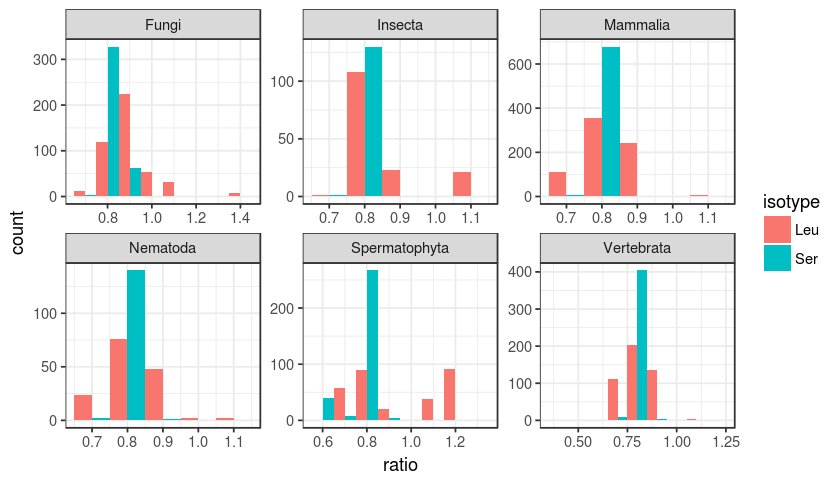

In [15]:
identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  mutate(ratio = D.loop / V.arm) %>%
  filter(ratio < 1.5) %>%
  ggplot() + geom_histogram(aes(x = ratio, fill = isotype), binwidth = 0.1, position = 'dodge') + facet_wrap(~ clade, scales = 'free')

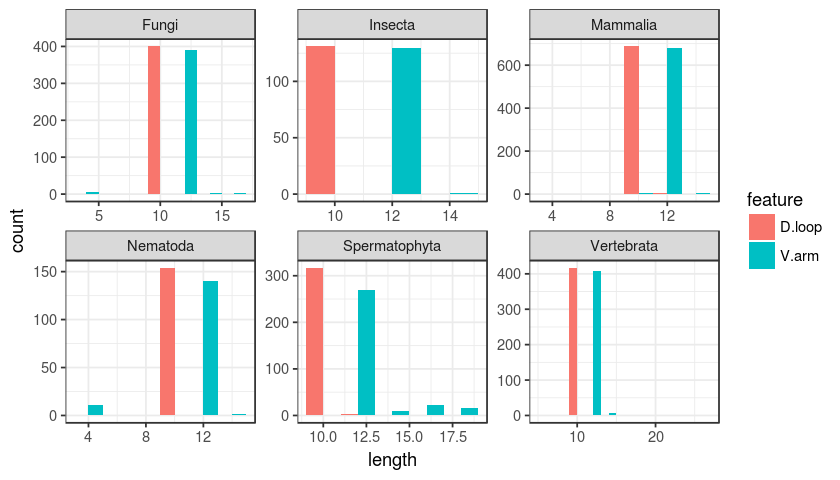

In [17]:
identities %>% filter(!restrict, isotype == "Ser") %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 20, V.arm < 30) %>%
  gather(feature, length, D.loop, V.arm) %>%
  ggplot() + geom_histogram(aes(x = length, fill = feature), binwidth = 2, position = 'dodge') + facet_wrap(~ clade, scales = 'free')

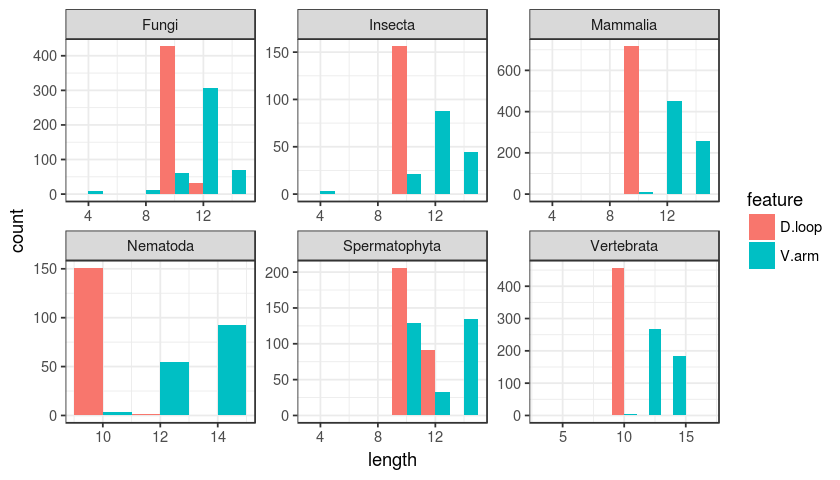

In [7]:
identities %>% filter(!restrict, isotype == "Leu") %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 20, V.arm < 30) %>%
  gather(feature, length, D.loop, V.arm) %>%
  ggplot() + geom_histogram(aes(x = length, fill = feature), binwidth = 2, position = 'dodge') + facet_wrap(~ clade, scales = 'free')

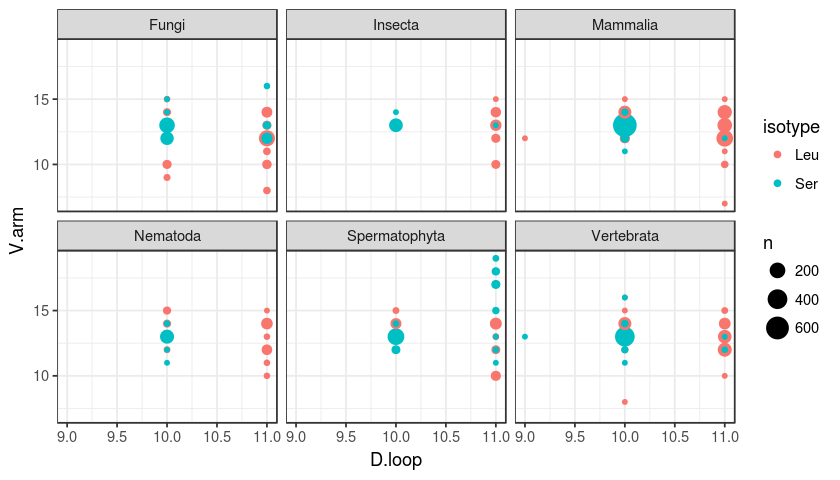

In [22]:
identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 12, D.loop > 7, V.arm < 21, V.arm > 6) %>% 
  ggplot() + geom_count(aes(x = D.loop, y = V.arm, color = isotype)) + facet_wrap(~ clade)

In [29]:
cor((identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 12, D.loop > 7, V.arm < 21, V.arm > 6) %>% select(D.loop) %>% unlist %>% unname),
    (identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 12, D.loop > 7, V.arm < 21, V.arm > 6) %>% select(V.arm) %>% unlist %>% unname))

[1] -0.126451

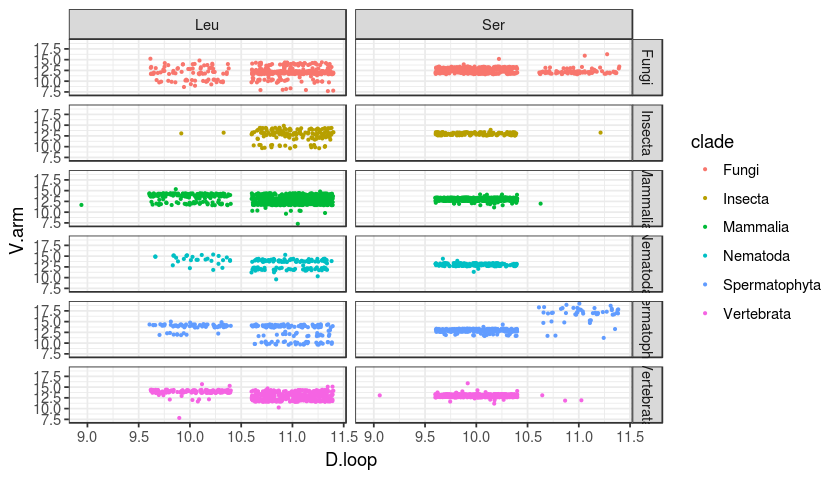

In [47]:
identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 12, D.loop > 7, V.arm < 21, V.arm > 6) %>% 
  ggplot() + geom_point(aes(x = D.loop, y = V.arm, color = clade), size = 0.5, position = 'jitter') + facet_grid(clade ~ isotype)

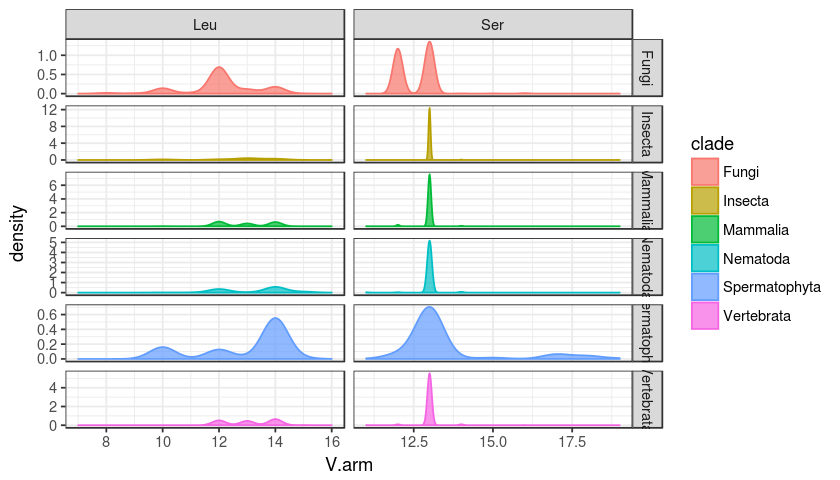

In [67]:
identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 12, D.loop > 7, V.arm < 21, V.arm > 6) %>% 
  ggplot() + geom_density(aes(x = V.arm, fill = clade, color = clade), alpha = 0.7) + facet_grid(clade ~ isotype, scales = "free")